In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
x = []
y = []

chem_data = pd.read_csv("/home/nirjhar/Python Codes/Fourier/BS-CH201 - Expt 3.csv")
chem_data

FileNotFoundError: [Errno 2] No such file or directory: '/home/nirjhar/Python Codes/Fourier/BS-CH201 - Expt 3.csv'

$\triangle$

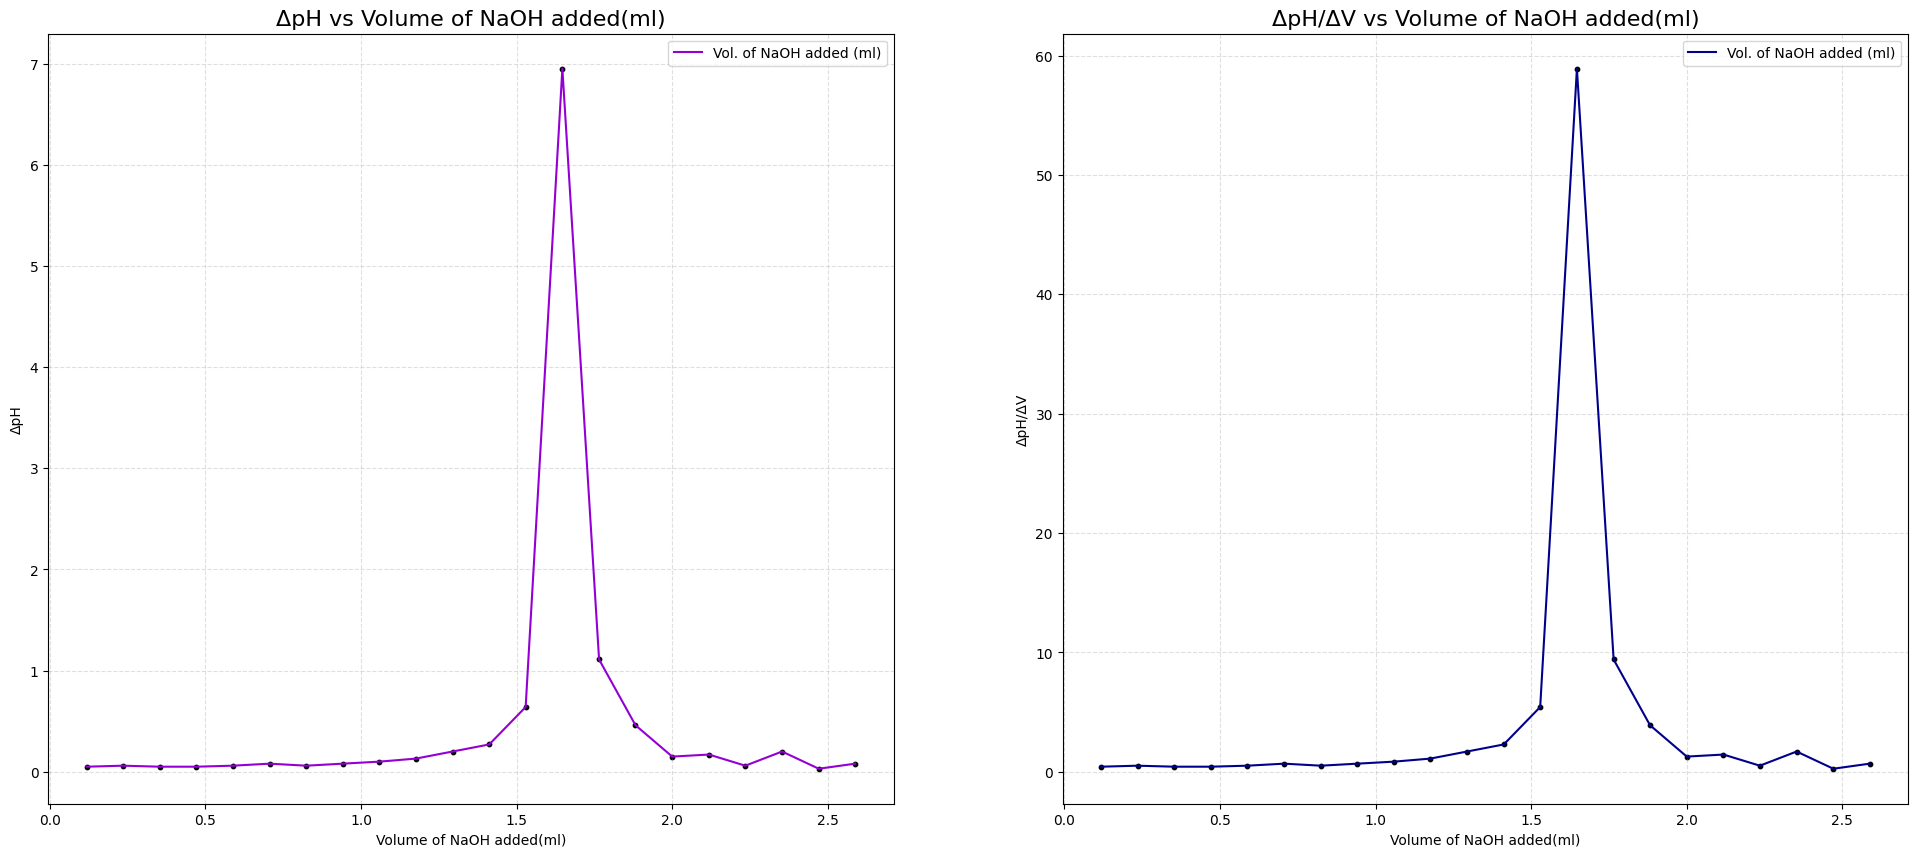

In [ ]:
dph = chem_data["ΔpH"]
dph_dv = chem_data["ΔpH/ΔV"]
vol_NaOH = chem_data["Vol. of NaOH added (ml)"]

plt.figure(figsize=(24, 10))
plt.subplot(1, 2, 1)
plt.title("ΔpH vs Volume of NaOH added(ml)", fontsize=16)
plt.scatter(vol_NaOH, dph, s=10, c="black")
plt.plot(vol_NaOH, dph, c="darkviolet", label="Vol. of NaOH added (ml)")
plt.xlabel("Volume of NaOH added(ml)")
plt.ylabel("ΔpH")
plt.legend()
plt.grid(linestyle="--", alpha=0.4)
plt.subplot(1, 2, 2)
plt.title("ΔpH/ΔV vs Volume of NaOH added(ml)", fontsize=16)
plt.scatter(vol_NaOH, dph_dv, s=10, c="black")
plt.plot(vol_NaOH, dph_dv, c="darkblue", label="Vol. of NaOH added (ml)")
plt.xlabel("Volume of NaOH added(ml)")
plt.ylabel("ΔpH/ΔV")
plt.legend()
plt.grid(linestyle="--", alpha=0.4)
plt.show()

In [ ]:
import qrcode

# Data to encode
data = "https://example.com"

# Create QR code instance
qr = qrcode.QRCode(
    version=1,  # Controls the size of the QR code (1 is the smallest)
    error_correction=qrcode.constants.ERROR_CORRECT_L,  # Error correction level
    box_size=10,  # Size of each box
    border=4,  # Border thickness
)

# Add data to the QR code
qr.add_data(data)
qr.make(fit=True)

# Create an image of the QR code
img = qr.make_image(fill="black", back_color="white")

# Save the image
img.save("qrcode.png")

# Show the image
img.show()


Gtk-Message: 23:30:51.372: Failed to load module "gail"
Gtk-Message: 23:30:51.373: Failed to load module "atk-bridge"

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate theme engine in module_path: "adwaita",

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate theme engine in module_path: "pixmap",

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate theme engine in module_path: "pixmap",

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate theme engine in module_path: "pixmap",

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate theme engine in module_path: "pixmap",

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate theme engine in module_path: "pixmap",

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate theme engine in module_path: "pixmap",

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate theme engine in module_path: "pixmap",

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate th

In [ ]:
c = 0
def tower_of_hanoi(n, rod_s, rod_d, rod_m):
    if(n==0):
        return
    tower_of_hanoi(n-1, rod_s, rod_m, rod_d)
    print("Move disk", n, "from rod", rod_s, "to rod", rod_d)
    global c
    c += 1
    tower_of_hanoi(n-1, rod_m, rod_d, rod_s)
    
tower_of_hanoi(3, "A", "C", "B")
print(c)

Move disk 1 from rod A to rod C
Move disk 2 from rod A to rod B
Move disk 1 from rod C to rod B
Move disk 3 from rod A to rod C
Move disk 1 from rod B to rod A
Move disk 2 from rod B to rod C
Move disk 1 from rod A to rod C
7


In [ ]:
a, b = 1, 2

b, a = a, b

a, b

(2, 1)

In [14]:
import hashlib
import numpy as np

data = "HELLO"

hashed_data = hashlib.sha256(data.encode()).digest()
np.random.seed(42)
"".join(np.random.choice(list(hashed_data.hex()), size=8).tolist())

'3ed1b7e3'

In [12]:
data = "HELLO"

hashed_data = hashlib.sha256(data.encode()).digest()
np.random.seed(42)
hash_key = "".join(np.random.choice(list(hashed_data.hex()), size=8).tolist())

In [34]:
OTP = 6004
binarykey = hash_key.encode()

def _temper(x: int) -> int:
        x ^= (x >> 11)
        x ^= (x << 7) & 0x9D2C5680
        x ^= (x << 15) & 0xEFC60000
        x ^= (x >> 18)
        
        return x
        
new_data = _temper(x=np.uint32(binarykey.hex()) ^ OTP)
hashed_data = hashlib.sha256(new_data).digest()
np.random.seed(42)
hash_key = "".join(np.random.choice(list(hashed_data.hex()), size=8).tolist())
hash_key

'b55cf52c'

In [3]:
# client.py
import socket

PORT = 8080 # Port to connect to the server (must match C++ server)
SERVER_IP = "127.0.0.1" # Server's IP address (localhost in this case)

def run_client():
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM) # Create a TCP socket

    try:
        client_socket.connect((SERVER_IP, PORT)) # Connect to the C++ server
        print(f"Connected to C++ server on {SERVER_IP}:{PORT}")

        message = "Hello from Python client"
        client_socket.send(message.encode('utf-8')) # Send data to the server (encode to bytes)
        print(f"Python client sent: {message}")

        response = client_socket.recv(1024).decode('utf-8') # Receive and decode data from the server
        print(f"C++ server says: {response}")

    except ConnectionRefusedError:
        print("Connection refused. Make sure the C++ server is running.")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        client_socket.close() # Close the socket
        print("Connection to C++ server closed")

if __name__ == "__main__":
    run_client()


Connected to C++ server on 127.0.0.1:8080
Python client sent: Hello from Python client
C++ server says: Hello from server!
Connection to C++ server closed


Of course. Here is the same presentation with LaTeX formatting for all mathematical notations and proper pseudocode instead of language-specific code.

-----

### **Slide 1: Title Slide**

**Asymptotic Notations in DSA**

**Understanding Algorithm Efficiency**

*Presented By: Nirjhar Debnath*
*Kalyani Government Engineering College, CSE*

-----

### **Slide 2: Why Do We Need Asymptotic Analysis? 🤔**

Imagine you have two sorting algorithms. How do you decide which is better?

  * **Problem with direct time measurement:**

      * **Hardware Dependent:** An algorithm might run faster on a supercomputer than on a laptop. Does that make it a better algorithm? No.
      * **Software Dependent:** The same code might perform differently when written in Python vs. C++, or when compiled with different settings.
      * **Input Dependent:** An algorithm might be fast for a small, sorted list but extremely slow for a large, random list.

  * **The Solution: Asymptotic Analysis**

      * It's a way to analyze algorithm performance that is independent of machine specifics.
      * It focuses on how the runtime or memory usage of an algorithm **grows as the input size ($n$) becomes very large**.

-----

### **Slide 3: What are Asymptotic Notations?**

Asymptotic notations are mathematical tools used to describe the limiting behavior of a function when the argument tends towards infinity.

In simple terms, for an input of size $n$, they describe the **rate of growth** of an algorithm's running time.

  * **Key Idea:** We ignore machine-dependent constants and focus on the parts of the runtime that grow the fastest as $n$ increases.
  * **Analogy:** If you're planning a cross-country road trip, you care more about the total distance and average speed ($n$) rather than the few minutes spent at traffic lights (constants).

-----

### **Slide 4: The Three Core Notations**

We use three primary notations to describe the runtime bounds of an algorithm, $f(n)$.

1.  **Big-O ($O$):** Defines the **Upper Bound** (Worst-Case).
      * "My algorithm will run no slower than this."
2.  **Omega Notation ($\\Omega$):** Defines the **Lower Bound** (Best-Case).
      * "My algorithm will run at least this fast."
3.  **Theta Notation ($\\Theta$):** Defines the **Tight Bound** (Average-Case / Precise Bound).
      * "My algorithm's runtime is precisely within this range."

-----

### **Slide 5: Big-O Notation ($O$) - The Upper Bound**

Big-O is the most common notation. It describes the **worst-case scenario**.

  * **Definition:** We say $f(n) = O(g(n))$ if there exist positive constants $c$ and $n\_0$ such that:
    $$0 \le f(n) \le c \cdot g(n) \text{ for all } n \ge n_0$$
  * **In English:** For a sufficiently large input size $n$, the runtime $f(n)$ is at most a constant $c$ times the growth rate $g(n)$.
  * **Example:** If an algorithm is $O(n^2)$, it means its runtime grows no faster than a quadratic function in the worst case.

-----

### **Slide 6: Big-O Example: Linear Search**

**Problem:** Find an element $x$ in an unsorted array of size $n$.

  * **Worst-Case:** The element is at the very last position, or it's not in the array at all. In this case, we have to check all $n$ elements.
  * **Analysis:** The number of comparisons is directly proportional to $n$. Let's say the runtime is $f(n) = 5n + 3$. As $n$ gets large, the $+3$ and the $5$ become insignificant. The dominant term is $n$.
  * **Conclusion:** The time complexity is **$O(n)$**.

**Pseudocode: LINEAR-SEARCH(A, x)**

```
1. for i = 1 to length[A]
2.     if A[i] == x
3.         return i
4. return NIL
```

-----

### **Slide 7: Omega Notation ($\\Omega$) - The Lower Bound**

Omega notation describes the **best-case scenario**.

  * **Definition:** We say $f(n) = \\Omega(g(n))$ if there exist positive constants $c$ and $n\_0$ such that:
    $$0 \le c \cdot g(n) \le f(n) \text{ for all } n \ge n_0$$
  * **In English:** For a sufficiently large input size $n$, the runtime $f(n)$ is at least a constant $c$ times the growth rate $g(n)$. It tells us the minimum amount of work an algorithm has to do.

-----

### **Slide 8: Omega Notation Example: Linear Search**

**Problem:** Find an element $x$ in an unsorted array of size $n$.

  * **Best-Case:** The element we are looking for is at the very first position (`A[1]`).
  * **Analysis:** We perform only one comparison. The number of operations is constant (e.g., 1), regardless of how large $n$ is.
  * **Conclusion:** The time complexity is **$\\Omega(1)$**. This means the algorithm will take *at least* constant time to execute, which is true for any non-trivial algorithm.

**Pseudocode: LINEAR-SEARCH(A, x)**

```
1. for i = 1 to length[A]  // Best case happens on the first iteration
2.     if A[i] == x
3.         return i
4. return NIL
```

-----

### **Slide 9: Theta Notation ($\\Theta$) - The Tight Bound**

Theta notation is the most precise. It means the algorithm's growth rate is "sandwiched" between two bounds.

  * **Definition:** We say $f(n) = \\Theta(g(n))$ if there exist positive constants $c\_1$, $c\_2$, and $n\_0$ such that:
    $$0 \le c_1 \cdot g(n) \le f(n) \le c_2 \cdot g(n) \text{ for all } n \ge n_0$$
  * **In English:** An algorithm has a complexity of $\\Theta(g(n))$ if its worst-case ($O$) and best-case ($\\Omega$) complexities are the same.
  * **Note:** Linear search is **not** $\\Theta(n)$ because its best case ($\\Omega(1)$) differs from its worst case ($O(n)$).

-----

### **Slide 10: Theta Notation Example: Finding the Maximum**

**Problem:** Find the largest element in an unsorted array of size $n$.

  * **Analysis:** To be certain you have the maximum value, you **must** look at every single element. You can't skip any.
      * **Best-Case:** You still look at all $n$ elements.
      * **Worst-Case:** You still look at all $n$ elements.
  * **Conclusion:** Since the number of operations is always proportional to $n$, the complexity is **$\\Theta(n)$**.

**Pseudocode: FIND-MAXIMUM(A)**

```
1. max_val = A[1]
2. for i = 2 to length[A]
3.     if A[i] > max_val
4.         max_val = A[i]
5. return max_val
```

-----

### **Slide 11: Common Growth Rates 📈**

Here are some common complexities, ordered from fastest (best) to slowest (worst).

| Notation | Name | Example |
| :--- | :--- | :--- |
| **$\\Theta(1)$** | Constant | Accessing an array element $A[i]$ |
| **$\\Theta(\\log n)$** | Logarithmic | Binary Search |
| **$\\Theta(n)$** | Linear | Linear Search, Finding Max |
| **$\\Theta(n \\log n)$** | Log-Linear | Merge Sort, Heap Sort |
| **$\\Theta(n^2)$** | Quadratic | Bubble Sort, Selection Sort |
| **$\\Theta(n^3)$** | Cubic | Basic Matrix Multiplication |
| **$\\Theta(2^n)$** | Exponential | Brute-force Traveling Salesman |
| **$\\Theta(n\!)$** | Factorial | Generating all permutations of a list |

-----

### **Slide 12: Example Analysis: Bubble Sort**

**Algorithm:** Repeatedly step through the list, compare adjacent elements, and swap them if they are in the wrong order.

  * **Analysis:** It has two nested loops.
      * The outer loop runs $n-1$ times.
      * The inner loop runs a number of times that depends on the outer loop, but in the worst case, it's about $n$ times.
      * Total operations are roughly proportional to a sum that resolves to $n^2$.
  * **Worst-Case ($O$):** A reverse-sorted array. We must perform the maximum number of swaps. The complexity is **$O(n^2)$**.
  * **Best-Case ($\\Omega$):** An already sorted array. With an optimization (a flag to check if any swaps occurred), we can stop after one pass. The complexity is **$\\Omega(n)$**.
  * **Average-Case ($\\Theta$):** For a random array, the complexity is **$\\Theta(n^2)$**.

**Pseudocode: BUBBLESORT(A)**

```
1. for i = 1 to length[A] - 1
2.     for j = length[A] down to i + 1
3.         if A[j] < A[j-1]
4.             exchange A[j] with A[j-1]
```

-----

### **Slide 13: What About Space Complexity? 💾**

Complexity isn't just about time\!

  * **Space Complexity:** The total amount of memory space an algorithm requires, as a function of the input size $n$.
  * **Auxiliary Space:** The extra or temporary space used by the algorithm, not including the space taken by the input itself.

**Examples:**

1.  **Bubble Sort / Linear Search:** These algorithms only need a few extra variables for temporary storage (like an index $i$ or a $\\text{temp}$ variable for swapping). Their auxiliary space complexity is constant, or **$O(1)$**.
2.  **Merge Sort:** This algorithm typically requires creating a temporary array that is the same size as the input array to merge sorted halves. Its auxiliary space complexity is **$O(n)$**.

-----

### **Slide 14: Summary & Key Takeaways**

  * **Asymptotic Analysis** is a powerful, hardware-independent tool for judging algorithm efficiency.
  * **Big-O ($O$)** gives the **Upper Bound** (worst-case) and is the most commonly cited metric.
  * **Omega ($\\Omega$)** gives the **Lower Bound** (best-case).
  * **Theta ($\\Theta$)** gives a **Tight Bound**, used when the best and worst cases have the same growth rate.
  * Always focus on the **dominant term** in the runtime function and ignore constants. For $f(n) = 3n^2 + 100n + 500$, the complexity is $\\Theta(n^2)$.
  * There is often a trade-off between **time complexity** and **space complexity**.

-----

### **Slide 15: Thank You\!**

**Questions?**

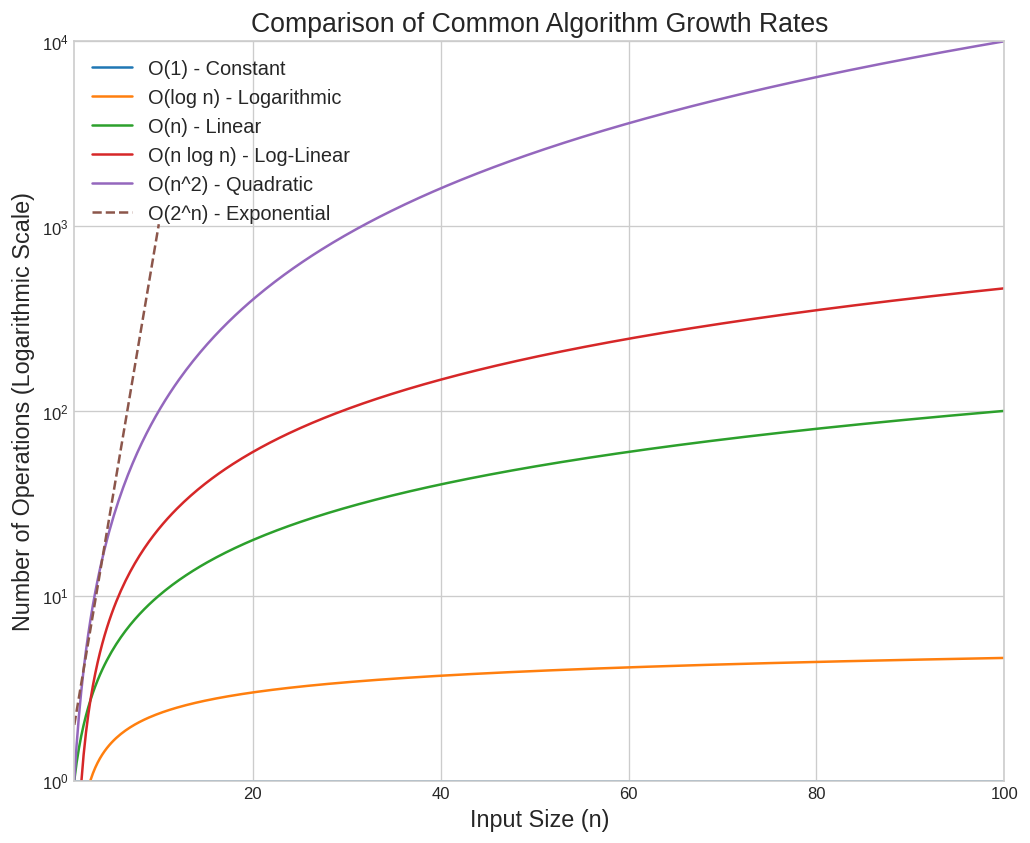

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the range for n
n = np.linspace(1, 100, 400) # Input size from 1 to 100

# Define the complexity functions
# We use 'where' to avoid log(0) issues, although our range starts at 1.
# Small constants are added to some functions for better visualization separation.
c = {
    'O(1)': np.ones_like(n),
    'O(log n)': np.log(n),
    'O(n)': n,
    'O(n log n)': n * np.log(n),
    'O(n^2)': n**2,
    'O(2^n)': 2**n
}

# Use a professional plot style
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)

# Plot each function
ax.plot(n, c['O(1)'], label='O(1) - Constant')
ax.plot(n, c['O(log n)'], label='O(log n) - Logarithmic')
ax.plot(n, c['O(n)'], label='O(n) - Linear')
ax.plot(n, c['O(n log n)'], label='O(n log n) - Log-Linear')
ax.plot(n, c['O(n^2)'], label='$O(n^2)$ - Quadratic')
# For the exponential function, we plot on a much smaller range to keep it visible
n_exp = np.linspace(1, 10, 100)
ax.plot(n_exp, 2**n_exp, label='$O(2^n)$ - Exponential', linestyle='--')


# Set plot scale and limits
# A logarithmic scale is crucial for comparing these functions
ax.set_yscale('log')
ax.set_xlim(1, 100)
ax.set_ylim(1, 10**4) # Set y-limit to keep the plot tidy

# Add labels and title
ax.set_xlabel('Input Size (n)', fontsize=14)
ax.set_ylabel('Number of Operations (Logarithmic Scale)', fontsize=14)
ax.set_title('Comparison of Common Algorithm Growth Rates', weight="bold", fontsize=16)
ax.legend(fontsize=12)

# Show the plot
plt.show()

<>:28: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:44: SyntaxWarning: invalid escape sequence '\O'
<>:28: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:44: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_10426/512226974.py:28: SyntaxWarning: invalid escape sequence '\c'
  ax.plot(n, upper_bound, label=f'$c_2 \cdot g(n) = {c2}n^2$ (Upper Bound)', linestyle='--', color='purple')
/tmp/ipykernel_10426/512226974.py:29: SyntaxWarning: invalid escape sequence '\c'
  ax.plot(n, lower_bound, label=f'$c_1 \cdot g(n) = {c1}n^2$ (Lower Bound)', linestyle='--', color='green')
/tmp/ipykernel_10426/512226974.py:44: SyntaxWarning: invalid escape sequence '\O'
  ax.set_title('Illustration of Asymptotic Bounds ($O, \Omega, \Theta$)', weight="bold", fontsize=16)


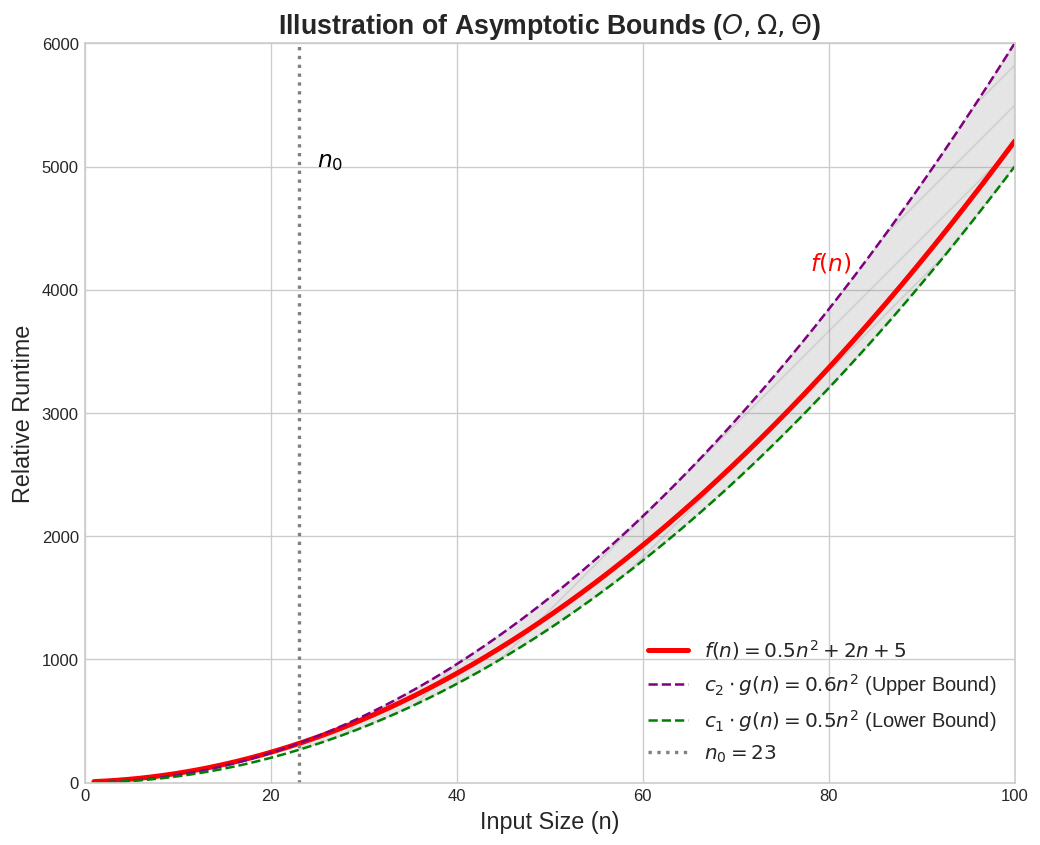

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the range for n
n = np.linspace(1, 100, 400)

# Define our functions
# g(n) is the base function for our bounds, let's use n^2
g_n = n**2
# f(n) is the actual function whose complexity we are analyzing
f_n = 0.5 * n**2 + 2 * n + 5

# Define constants for the bounds
c1 = 0.5  # Constant for the lower bound (Omega)
c2 = 0.6  # Constant for the upper bound (O)
n0 = 23   # The point from which the Theta-bound holds

# Calculate the bounding functions
lower_bound = c1 * g_n
upper_bound = c2 * g_n

# Use a professional plot style
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)

# Plot the functions
ax.plot(n, f_n, label='$f(n) = 0.5n^2 + 2n + 5$', linewidth=3, color='red')
ax.plot(n, upper_bound, label=f'$c_2 \cdot g(n) = {c2}n^2$ (Upper Bound)', linestyle='--', color='purple')
ax.plot(n, lower_bound, label=f'$c_1 \cdot g(n) = {c1}n^2$ (Lower Bound)', linestyle='--', color='green')

# Highlight the n0 point
ax.axvline(x=n0, color='gray', linestyle=':', linewidth=2, label=f'$n_0 = {n0}$')

# Fill the area between the bounds to show the "sandwich"
ax.fill_between(n, lower_bound, upper_bound, where=n >= n0, color='gray', alpha=0.2, hatch='/')

# Add annotations
ax.text(78, 0.8 * f_n[-1], '$f(n)$', fontsize=14, color='red')
ax.text(n0 + 2, 5000, '$n_0$', fontsize=14, color='black')

# Add labels and title
ax.set_xlabel('Input Size (n)', fontsize=14)
ax.set_ylabel('Relative Runtime', fontsize=14)
ax.set_title('Illustration of Asymptotic Bounds ($O, \Omega, \Theta$)', weight="bold", fontsize=16)
ax.legend(fontsize=12)

# Set plot limits
ax.set_xlim(0, 100)
ax.set_ylim(0, 6000)

# Show the plot
plt.show()

In [ ]:
import socket
import threading

def receive_messages(sock):
    while True:
        try:
            data = sock.recv(1024)
            if not data:
                break
            print(data.decode(), end="")
        except:
            break

def main():
    host = "127.0.0.1"
    port = 5000

    sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    sock.connect((host, port))

    cid = input("Enter your client ID: ")
    sock.sendall((cid + "\n").encode())

    threading.Thread(target=receive_messages, args=(sock,), daemon=True).start()

    while True:
        msg = input()
        sock.sendall((msg + "\n").encode())

if __name__ == "__main__":
    main()


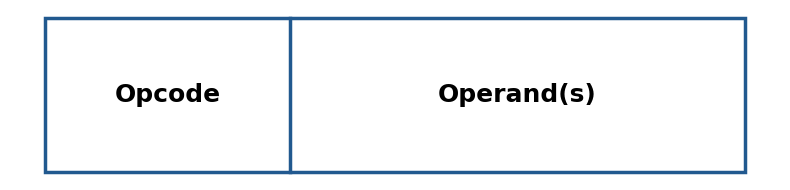

In [6]:
import matplotlib.pyplot as plt

# Define colors from your LaTeX theme
myblue = '#21598F'
myblue_bg = '#D6E9F8'

fig, ax = plt.subplots(figsize=(8, 2))

# Hide axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_facecolor('none')

# Draw the main instruction container
rect = plt.Rectangle((0, 0), 1, 1, facecolor='none', edgecolor=myblue, lw=2.5)
ax.add_patch(rect)

# Draw the divider
ax.plot([0.35, 0.35], [0, 1], color=myblue, lw=2.5)

# Add text labels
ax.text(0.175, 0.5, 'Opcode', ha='center', va='center', fontsize=18, fontweight='bold', color='black')
ax.text(0.675, 0.5, 'Operand(s)', ha='center', va='center', fontsize=18, fontweight='bold', color='black')

plt.tight_layout()

# Save the figure
plt.savefig('instruction_parts.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

In [9]:
from graphviz import Digraph

# Define colors from your LaTeX theme
myblue = '#21598F'
myaccent = '#FF9933'
myblue_bg = '#D6E9F8'

# Create a new directed graph
dot = Digraph('AddressingModes', graph_attr={'rankdir': 'LR', 'splines':'ortho'})

# Node styles
node_style = {
    'shape': 'record',
    'style': 'filled',
    'color': myblue,
    'fillcolor': myblue_bg,
    'fontname': 'Helvetica',
    'fontsize': '14',
    'penwidth': '2'
}

accent_node_style = {
    **node_style,
    'fillcolor': '#FFDDC1' # orange!10
}

# Edge (arrow) styles
edge_style = {
    'color': myblue,
    'fontname': 'Helvetica',
    'fontsize': '10',
    'penwidth': '1.5'
}

# Define nodes
dot.node('instr', 'Instruction\n| { <op> Opcode | <oper> Operand Field }', **node_style)
dot.node('regs', 'Register File', **node_style)
dot.node('mem', 'Main Memory', **node_style)
dot.node('data', 'Operand Data', **accent_node_style)

# Define edges for each addressing mode
# 1. Immediate
dot.edge('instr:oper', 'data', label='  Immediate Mode\n  (Operand is the data)  ', **edge_style)

# 2. Register Direct
dot.edge('instr:oper', 'regs', label='Register Direct', **edge_style)
dot.edge('regs', 'data', label='(Operand is in Register)', **edge_style)

# 3. Memory Direct
dot.edge('instr:oper', 'mem', label='  Memory Direct / Absolute\n  (Operand field is address)  ', **edge_style)
dot.edge('mem', 'data', label='(Data is fetched from Memory)', **edge_style)

# 4. Register Indirect
dot.edge('instr:oper', 'regs:e', label=' Register Indirect', **edge_style, tailport='s', headport='n')
dot.edge('regs:e', 'mem:w', label='  (Register holds address)  ', **edge_style, tailport='s', headport='n')


# Render and save the image
# The 'format='png'' argument tells Graphviz to output a PNG file.
# The 'cleanup=True' argument removes the intermediate source file.
dot.render('addressing_modes', format='png', cleanup=True)

print("Generated addressing_modes.png")

Generated addressing_modes.png


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 5.1 MB/s  0:00:06m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.3/869.3 kB 5.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 5.6 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 5.0 MB/s  0:00:02m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 4.8 MB/s  0:00:03 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 7.4 MB/s  0:00:00 eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 6.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.7/939.7 kB 3.6 MB/s  0:00:00 eta 0:

[nltk_data] Downloading package punkt to /home/nirjhar/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nirjhar/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/nirjhar/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## 1. Basic Text Statistics
Total Words: 2617961
Total Sentences: 183816
Total Characters: 12721028

## 2. Frequency Analysis
Top 20 most common words (excluding stopwords):
- like: 9345
- among: 8101
- great: 7353
- dharma: 5829
- battle: 5570
- arrows: 5231
- lineage: 5053
- supreme: 4727
- lord: 4526
- gods: 4225
- words: 4153
- chapter: 4145
- earth: 3686
- also: 3527
- many: 3423
- bharata: 3344
- must: 3306
- always: 3184
- sons: 2929
- time: 2866


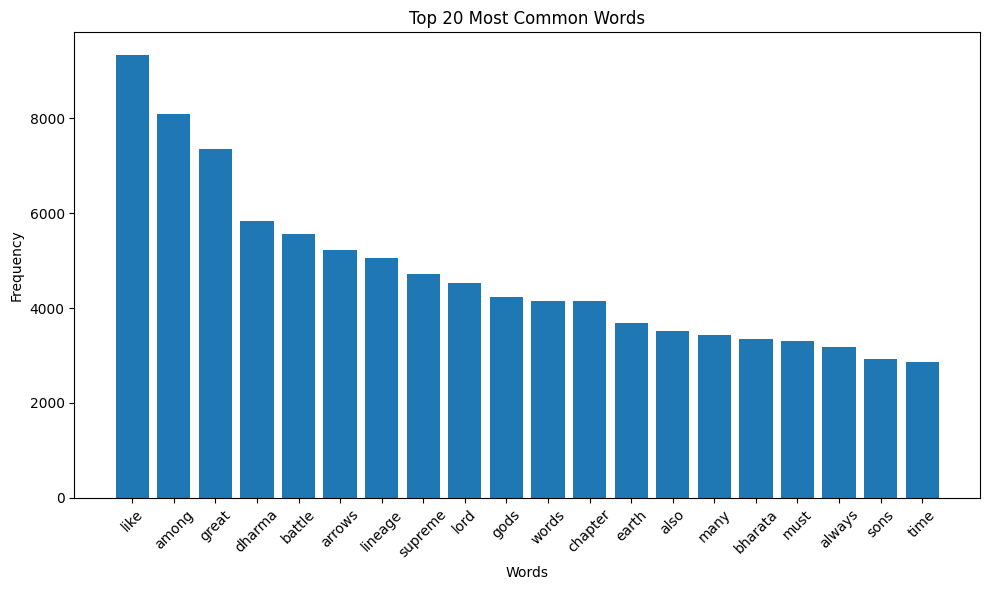



## 3. Named Entity Recognition (NER)


KeyboardInterrupt: 

In [1]:
# Install necessary libraries before running the script:
! pip install nltk spacy matplotlib textstat
! python -m spacy download en_core_web_sm

import nltk
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import textstat
import re

# Download necessary NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

def perform_eda(file_path):
    """
    Performs Exploratory Data Analysis on a given text file.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # --- 1. Basic Text Statistics ---
    print("## 1. Basic Text Statistics")
    words = nltk.word_tokenize(text)
    sentences = nltk.sent_tokenize(text)
    characters = len(text)
    print(f"Total Words: {len(words)}")
    print(f"Total Sentences: {len(sentences)}")
    print(f"Total Characters: {characters}\n")

    # --- 2. Frequency Analysis ---
    print("## 2. Frequency Analysis")
    # Remove stopwords and punctuation
    stop_words = set(nltk.corpus.stopwords.words('english'))
    # Add custom stopwords that are common in this text but not informative
    custom_stopwords = ['said', 'o', 'one', 'king', 'son', 'men', 'shall', 'unto', 'thee', 'thy', 'thou']
    stop_words.update(custom_stopwords)

    words_no_punct = [word.lower() for word in words if word.isalpha()]
    filtered_words = [word for word in words_no_punct if word not in stop_words]

    # Get the most common words
    word_counts = Counter(filtered_words)
    most_common_words = word_counts.most_common(20)
    print("Top 20 most common words (excluding stopwords):")
    for word, count in most_common_words:
        print(f"- {word}: {count}")

    # Plot word frequency distribution
    words_for_plot, counts_for_plot = zip(*most_common_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words_for_plot, counts_for_plot)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Top 20 Most Common Words")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("\n")

    # --- 3. Named Entity Recognition (NER) ---
    print("## 3. Named Entity Recognition (NER)")
    nlp = spacy.load("en_core_web_sm")

    # Function to split text into chunks
    def chunk_text(text, max_length=1000000):
        """Splits text into chunks of a maximum length."""
        chunks = []
        start = 0
        while start < len(text):
            end = start + max_length
            # Try to split at a sentence boundary near the end of the chunk
            if end < len(text):
                sentence_end = text.rfind('.', start, end)
                if sentence_end != -1 and sentence_end > start:
                    end = sentence_end + 1
            chunks.append(text[start:end])
            start = end
        return chunks

    text_chunks = chunk_text(text)

    # Process chunks for NER
    all_entities = {'PERSON': [], 'GPE': [], 'ORG': []}
    for chunk in text_chunks:
        doc = nlp(chunk)
        for ent in doc.ents:
            if ent.label_ in all_entities:
                all_entities[ent.label_].append(ent.text)


    print("Top 10 most frequent named entities:")
    for label, items in all_entities.items():
        print(f"\n### {label}:")
        entity_counts = Counter(items)
        for entity, count in entity_counts.most_common(10):
            # Clean up entities that are just noise
            if len(entity.strip()) > 2 and '\n' not in entity:
                print(f"- {entity}: {count}")
    print("\n")


    # --- 4. Readability Score ---
    print("## 4. Readability Score")
    # Using the Flesch Reading Ease score
    readability_score = textstat.flesch_reading_ease(text)
    print(f"Flesch Reading Ease Score: {readability_score}")
    print("(Higher scores indicate easier readability. Scores between 60-70 are considered plain English.)\n")


if __name__ == "__main__":
    # Replace 'fts.txt' with the path to your file if it's in a different directory
    perform_eda('fts.txt')

In [10]:
number = int(input("THE NUMBER :"))
print(f"THE NUMBER IS : {number}")

THE NUMBER IS : 10
